Objetivo: Criar um modelo para classificar os emails em spam ou não utilizando o algoritmo de Machine Learning Support Vector Machine

In [1]:
import pandas as pd # Importa a a biblioteca pandas

In [2]:
df = pd.read_csv('dadosspam.csv') # Importa base de dados

In [3]:
df.head() # Exibe as 4 primeiras linhas do dataframe

frequencia_palavras  presenca_links  num_anexos  comprimento_email  spam
0                    6               0           1                793     0
1                    3               0           1                698     0
2                    7               1           1                455     1
3                    4               1           1                810     0
4                    6               0           3                620     1

Separando os dados do dataset


In [4]:
X = df.drop('spam', axis=1) # Exclui a coluna spam
y = df['spam'] # Armazena os dados da coluna spam

In [5]:
X

frequencia_palavras  presenca_links  num_anexos  comprimento_email
0                      6               0           1                793
1                      3               0           1                698
2                      7               1           1                455
3                      4               1           1                810
4                      6               0           3                620
..                   ...             ...         ...                ...
995                    9               1           3                313
996                    9               1           0                228
997                    7               0           1                362
998                    1               1           3                107
999                    8               1           2                837

[1000 rows x 4 columns]

In [6]:
y

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    1
Name: spam, Length: 1000, dtype: int64

Dividindo a base de dados em treino e teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_teste, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)

Importa a biblioteca SVM para o modelo support vector machine

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [10]:
model = SVC(kernel='linear') # Cria modelo de support vector machine

Treinamento do modelo

In [11]:
model.fit(x_train, y_train) #Treina o modelo de SVM

SVC(kernel='linear')

Realizando predições

In [12]:
y_prev = model.predict(x_teste) # Realiza predições

In [13]:
y_prev # Exibe as previsões

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], d

In [14]:
x_teste #Exibe os dados de teste

frequencia_palavras  presenca_links  num_anexos  comprimento_email
521                    4               0           3                315
737                    7               0           4                578
740                    3               0           2                680
660                    4               0           3                 78
411                    8               0           2                337
..                   ...             ...         ...                ...
468                    2               0           3                706
935                    0               1           4                800
428                    3               1           4                202
7                      6               1           4                446
155                    4               1           4                291

[300 rows x 4 columns]

Avaliando o modelo

In [15]:
accuracy = accuracy_score(y_test, y_prev)
conf_matrix = confusion_matrix(y_test, y_prev)
prec = precision_score(y_test, y_prev)
f1 = f1_score(y_test, y_prev)
print('Precisão {prec:.2f}')
print(f'Acurácia: {accuracy:.2f}')
print(f'F1_Score: {f1:.2f}')
print(conf_matrix)

Precisão {prec:.2f}
Acurácia: 0.99
F1_Score: 0.99
[[149   0]
 [  4 147]]


Vizualizando os dados


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

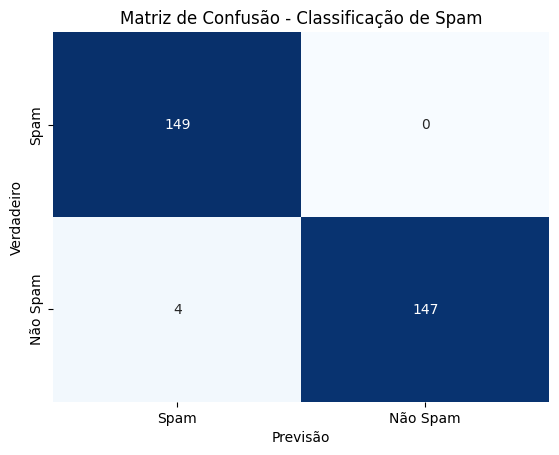

In [17]:
# cria matriz de confusão de forma visual xticks e yticks são os rótulos da matriz
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Spam', 'Não Spam'], yticklabels=['Spam', 'Não Spam']) 
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de Spam')
plt.show()

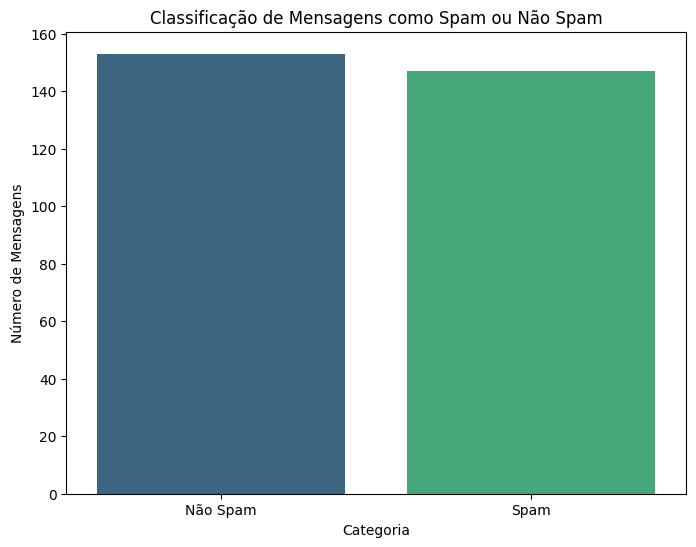

147
153


In [18]:
# Contagem de predições
spam_count = sum(y_prev)
non_spam_count = len(y_prev) - spam_count

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Não Spam', 'Spam'], y=[non_spam_count, spam_count], palette='viridis') # palete cor do heat map
plt.xlabel('Categoria')
plt.ylabel('Número de Mensagens')
plt.title('Classificação de Mensagens como Spam ou Não Spam')
plt.show()
print(spam_count)
print(non_spam_count)